In [187]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from neuralforecast import NeuralForecast
from neuralforecast.models import NHITS, LSTM
from synthetictime.simple_time_series import SimpleTimeSeries
from neuralforecast.losses.pytorch import MQLoss

# First we set a random seed
np.random.seed(7)

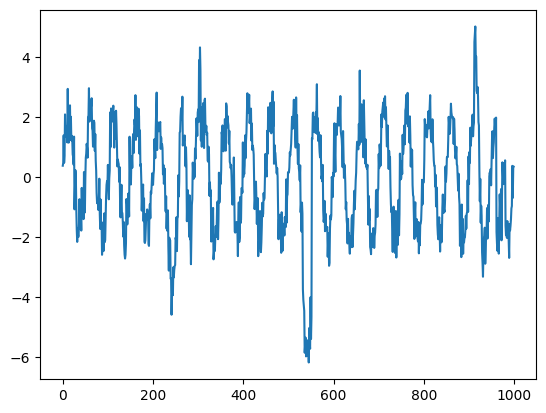

In [206]:
# Now we initiate a simple time series object with the desired parameters
# This also automatically generates the time series
example_series = SimpleTimeSeries(
    size=1000,
    base_amplitude=2.0,
    base_frequency=0.02,
    base_noise_scale=1,
    base_noise_amplitude=0.5,
    number_of_cosine_events=5,
    cosine_frequency_low=0.01,
    cosine_frequency_high=0.01,
    cosine_amplitude_low=2.0,
    cosine_amplitude_high=8,
)
synthetic_timeseries = example_series.synthetic_time_series
plt.plot(synthetic_timeseries)
plt.show()

In [207]:
# transform the synthetic time series into a pandas dataframe
synthetic_timeseries = pd.DataFrame(
    {
        "unique_id": 1.0,
        "ds": np.arange(len(synthetic_timeseries)),
        "y": synthetic_timeseries,
    }
)

In [208]:
horizon = 86
Y_train = synthetic_timeseries[:-horizon]
Y_test = synthetic_timeseries[-horizon:]
horizon = len(Y_test)

In [209]:
levels = [80, 90]
models = [
    LSTM(input_size=3 * horizon, h=horizon, loss=MQLoss(level=levels), max_steps=1000)
]
nf = NeuralForecast(
    models=models,
    freq=1,
)
nf.fit(df=Y_train)

/home/scc/mf9638/miniconda3/envs/XUQ-TimeSeriesForecast/lib/python3.10/site-packages/pytorch_lightning/utilities/parsing.py:199: Attribute 'loss' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['loss'])`.
[rank: 0] Seed set to 1
/home/scc/mf9638/miniconda3/envs/XUQ-TimeSeriesForecast/lib/python3.10/site-packages/lightning_fabric/plugins/environments/slurm.py:204: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /home/scc/mf9638/miniconda3/envs/XUQ-TimeSeriesForec ...
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [MIG-f26f55f4-95ca-5a94-853c-d922a3dbfde6]

  | Name            | Type          | Params
--------------------

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/home/scc/mf9638/miniconda3/envs/XUQ-TimeSeriesForecast/lib/python3.10/site-packages/pytorch_lightning/loops/fit_loop.py:298: The number of training batches (1) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=1000` reached.


In [210]:
predictions = nf.predict()

/home/scc/mf9638/miniconda3/envs/XUQ-TimeSeriesForecast/lib/python3.10/site-packages/neuralforecast/tsdataset.py:92: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.temporal = torch.tensor(temporal, dtype=torch.float)
/home/scc/mf9638/miniconda3/envs/XUQ-TimeSeriesForecast/lib/python3.10/site-packages/lightning_fabric/plugins/environments/slurm.py:204: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /home/scc/mf9638/miniconda3/envs/XUQ-TimeSeriesForec ...
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [MIG-f26f55f4-95ca-5a94-853c-d922a3dbfde6]


Predicting: |          | 0/? [00:00<?, ?it/s]

/home/scc/mf9638/miniconda3/envs/XUQ-TimeSeriesForecast/lib/python3.10/site-packages/neuralforecast/core.py:184: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


In [211]:
predictions.head()

,ds,LSTM-median,LSTM-lo-90,LSTM-lo-80,LSTM-hi-80,LSTM-hi-90
unique_id,,,,,,
1.0,914,2.137135,1.205019,1.450722,2.998145,3.270712
1.0,915,2.104048,1.133222,1.350480,2.961473,3.186902
1.0,916,1.982215,1.164920,1.285885,2.829236,3.024799
1.0,917,1.861749,0.997877,1.130156,2.747572,2.920898
1.0,918,1.701035,0.899220,1.058336,2.570342,2.789678


/scratch/slurm_tmpdir/job_1427625/ipykernel_3762620/1755001316.py:3: FutureWarning: The behavior of obj[i:j] with a float-dtype index is deprecated. In a future version, this will be treated as positional instead of label-based. For label-based slicing, use obj.loc[i:j] instead
  plt.plot(predictions.ds[-last:], predictions["LSTM-median"][-last:], label="Predictions", color="green")
/scratch/slurm_tmpdir/job_1427625/ipykernel_3762620/1755001316.py:6: FutureWarning: The behavior of obj[i:j] with a float-dtype index is deprecated. In a future version, this will be treated as positional instead of label-based. For label-based slicing, use obj.loc[i:j] instead
  predictions.ds[-last:],
/scratch/slurm_tmpdir/job_1427625/ipykernel_3762620/1755001316.py:7: FutureWarning: The behavior of obj[i:j] with a float-dtype index is deprecated. In a future version, this will be treated as positional instead of label-based. For label-based slicing, use obj.loc[i:j] instead
  predictions["LSTM-lo-90"][-l

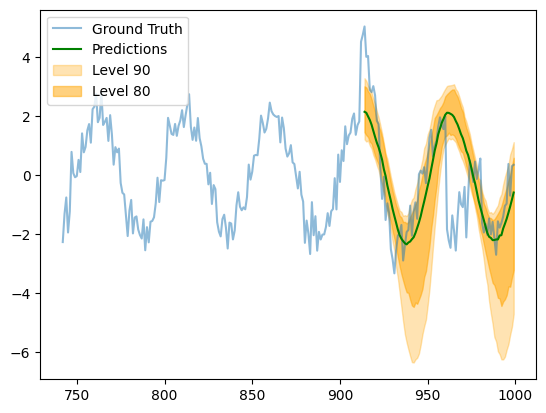

In [214]:
last = horizon * 3
plt.plot(
    synthetic_timeseries.ds[-last:],
    synthetic_timeseries.y[-last:],
    label="Ground Truth",
    alpha=0.5,
)
plt.plot(
    predictions.ds[-last:],
    predictions["LSTM-median"][-last:],
    label="Predictions",
    color="green",
)

plt.fill_between(
    predictions.ds[-last:],
    predictions["LSTM-lo-90"][-last:],
    predictions["LSTM-hi-90"][-last:],
    alpha=0.3,
    color="orange",
    label="Level 90",
)
plt.fill_between(
    predictions.ds[-last:],
    predictions["LSTM-lo-80"][-last:],
    predictions["LSTM-hi-80"][-last:],
    alpha=0.5,
    color="orange",
    label="Level 80",
)

plt.legend(loc="upper left")
plt.show()